# Heart Failure Prediction 
To predict whether the patient is going to have a heart failure or not.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [2]:
df = pd.read_csv('data.csv')

df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


### Shape and Name. of columns

In [3]:
print('Shape of dataset', df.shape)
print("Column names: \n",df.columns)

Shape of dataset (299, 13)
Column names: 
 Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


### Checking missing values

In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
(df.isnull().sum()/df.shape[0])*100

### Statistical Description of the dataset

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Countplot of target feature

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

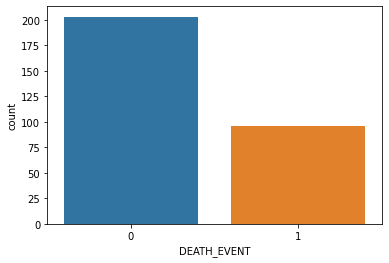

In [34]:
sns.countplot(x='DEATH_EVENT',data=df)

In [3]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

### Finding the correlation between different features

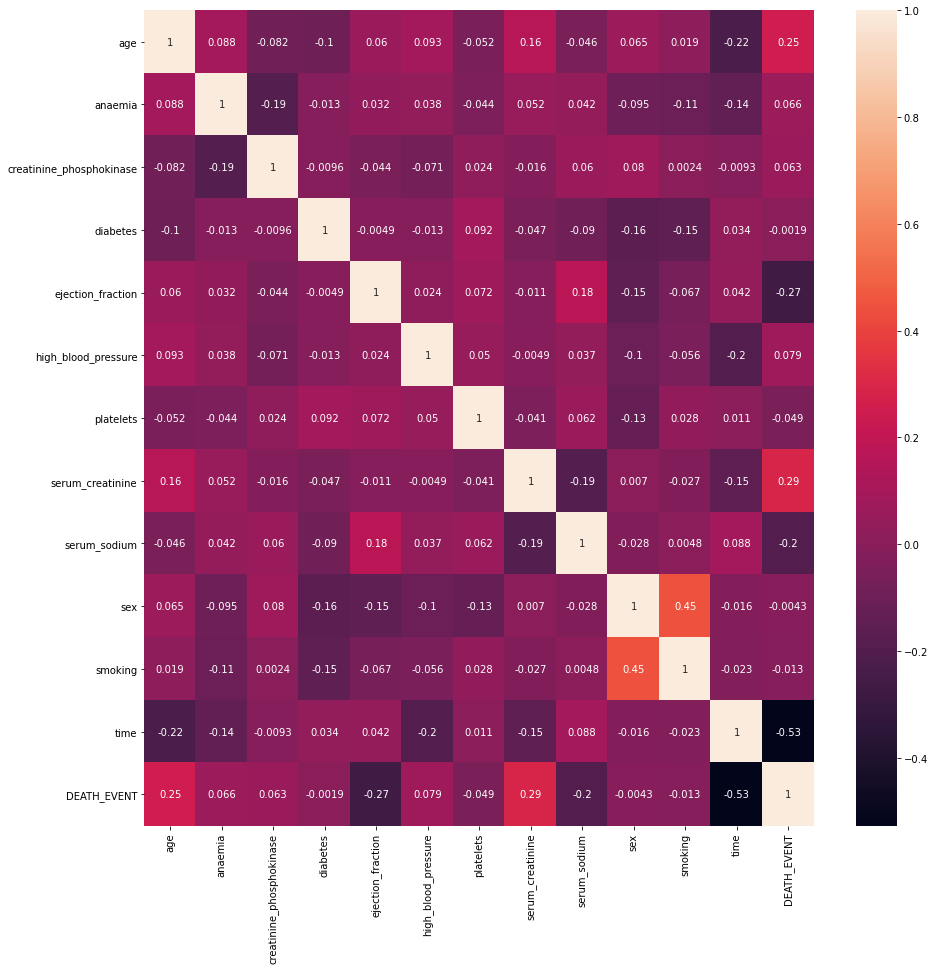

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

###  Feature Importance

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

[0.09787061 0.02609703 0.07066813 0.03330861 0.1249716  0.02685956
 0.07493158 0.11765017 0.08236186 0.0271825  0.02756842 0.29052992]


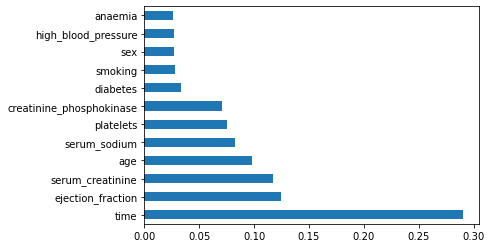

In [8]:
x = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [9]:
# In terms of percentage
feat_importances*100

age                          9.787061
anaemia                      2.609703
creatinine_phosphokinase     7.066813
diabetes                     3.330861
ejection_fraction           12.497160
high_blood_pressure          2.685956
platelets                    7.493158
serum_creatinine            11.765017
serum_sodium                 8.236186
sex                          2.718250
smoking                      2.756842
time                        29.052992
dtype: float64

In [10]:
sum(feat_importances.nlargest(6))

0.7883157541591576

### Splitting the data and Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
inp_data = df.iloc[:,[0,2,4,7,8,11]]
out_data = df[['DEATH_EVENT']]

X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2, random_state=0)

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (239, 6)
X_test Shape  :  (60, 6)
y_train Shape :  (239, 1)
y_test Shape  :  (60, 1)


### Building a model and evaluating it

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report

In [16]:
clf_1 = DecisionTreeClassifier(random_state=0)
clf_1.fit(X_train, y_train)
y_pred = clf_1.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Decision Tree Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
print('Decision Tree Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
print('Decision Tree Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
print("Decision Tree Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7333
Decision Tree Classifier f1-score      : 0.6190
Decision Tree Classifier precision     : 0.6842
Decision Tree Classifier recall        : 0.5652
Decision Tree Classifier roc auc score : 0.7015

               precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.57      0.68      0.62        19

    accuracy                           0.73        60
   macro avg       0.70      0.72      0.71        60
weighted avg       0.75      0.73      0.74        60



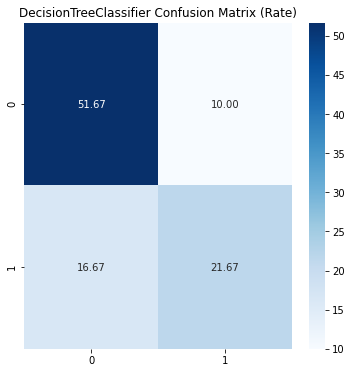

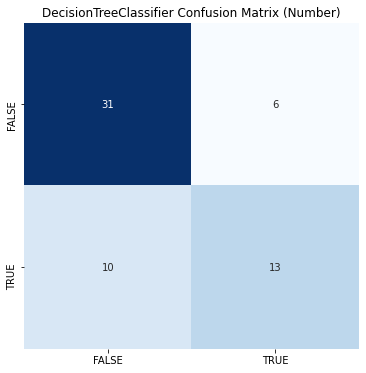

In [17]:
plt.figure(figsize=(6,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")
plt.title("DecisionTreeClassifier Confusion Matrix (Rate)")
plt.show()

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=["FALSE","TRUE"],
            yticklabels=["FALSE","TRUE"],
            cbar=False)
plt.title("DecisionTreeClassifier Confusion Matrix (Number)")
plt.show()

### Hyperparameter tuning using GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {
    "max_depth": np.arange(1,10),
    "min_samples_split": [0.001, 0.01, 0.1, 0.2, 0.02, 0.002],
    "criterion": ["gini", "entropy", None],
    "max_leaf_nodes": np.arange(1,10),
    "class_weight": ["balanced", None]
}

clf_2 = DecisionTreeClassifier()
grid = GridSearchCV(clf_2, param_grid, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 2916 candidates, totalling 29160 fits


C:\Users\Virat\anaconda3\envs\tensorflow and keras\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 2,
 'min_samples_split': 0.001}

### Implementing the Hyperparameters

Accuracy Score: 0.8167
Decision Tree Classifier f1-score      : 0.7179
Decision Tree Classifier precision     : 0.8750
Decision Tree Classifier recall        : 0.6087
Decision Tree Classifier roc auc score : 0.7773

               precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.61      0.88      0.72        16

    accuracy                           0.82        60
   macro avg       0.78      0.84      0.79        60
weighted avg       0.86      0.82      0.83        60



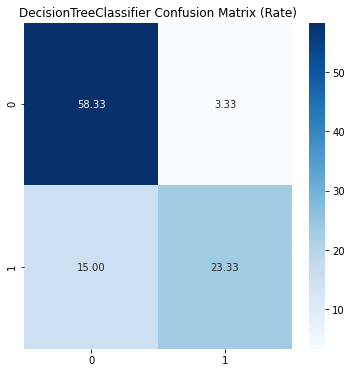

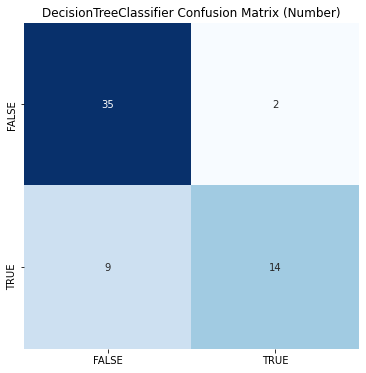

In [20]:
clf_2 = DecisionTreeClassifier(
    class_weight='balanced',
    criterion='gini',
    max_depth=1,
    max_leaf_nodes=2,
    min_samples_split=0.001,
    random_state=0
)

clf_2.fit(X_train, y_train)
y_pred = clf_2.predict(X_test)
    
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Decision Tree Classifier f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
print('Decision Tree Classifier precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
print('Decision Tree Classifier recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
print("Decision Tree Classifier roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))
print("\n",classification_report(y_pred, y_test))
    
plt.figure(figsize=(6,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")
plt.title("DecisionTreeClassifier Confusion Matrix (Rate)")
plt.show()

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=["FALSE","TRUE"],
            yticklabels=["FALSE","TRUE"],
            cbar=False)
plt.title("DecisionTreeClassifier Confusion Matrix (Number)")
plt.show()

<Figure size 864x7200 with 0 Axes>

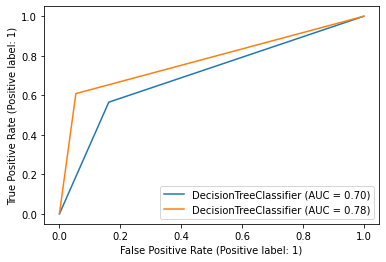

In [33]:
from sklearn.metrics import plot_roc_curve
fig = plot_roc_curve(clf_1, X_test, y_test)
fig = plot_roc_curve(clf_2, X_test, y_test, ax = fig.ax_)
plt.show()